In [1]:
import math
import numpy as np
from scipy.stats import binom

import matplotlib.pyplot as plt

In [2]:
def analytical_footprint(m_thresh, n, p):
    fp = 0
    fp += (1 - p) * (1 - binom.cdf(m_thresh-1, n-1, p)) * np.log2((1 - binom.cdf(m_thresh-1, n-1, p)) / (1 - binom.cdf(m_thresh-1, n, p)))
    fp += (1 - p) * binom.cdf(m_thresh-1, n-1, p) * np.log2(binom.cdf(m_thresh-1, n-1, p) / binom.cdf(m_thresh-1, n, p))
    fp += p * (1 - binom.cdf(m_thresh-2, n-1, p)) * np.log2((1 - binom.cdf(m_thresh-2, n-1, p)) / (1 - binom.cdf(m_thresh-1, n, p)))
    fp += p * binom.cdf(m_thresh-2, n-1, p) * np.log2(binom.cdf(m_thresh-2, n-1, p) / binom.cdf(m_thresh-1, n, p))
    return fp

In [3]:
m_thresh_list = np.arange(2, 16)

footprint_list = []
for m_thresh in m_thresh_list:
    footprint_list.append(analytical_footprint(m_thresh, 20, 0.1))

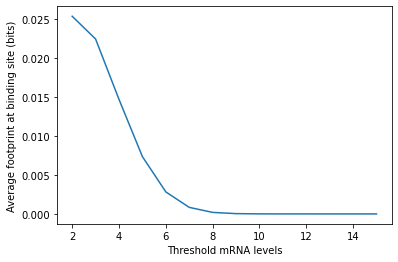

In [5]:
fig, ax = plt.subplots()
ax.plot(m_thresh_list, footprint_list)
ax.set_xlabel('Threshold mRNA levels')
ax.set_ylabel('Average footprint at binding site (bits)')
plt.show()

In [6]:
n_list = np.arange(10, 30)

footprint_list = []
for n in n_list:
    footprint_list.append(analytical_footprint(math.floor(n/2), n, 0.1))

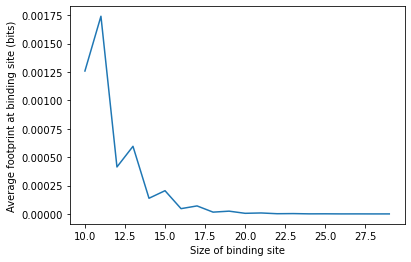

In [7]:
fig, ax = plt.subplots()
ax.plot(n_list, footprint_list)
ax.set_xlabel('Size of binding site')
ax.set_ylabel('Average footprint at binding site (bits)')
plt.show()